In [4]:
import pandas as pd
file_path = r"/customer-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
missing_values = df.isnull().sum()
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


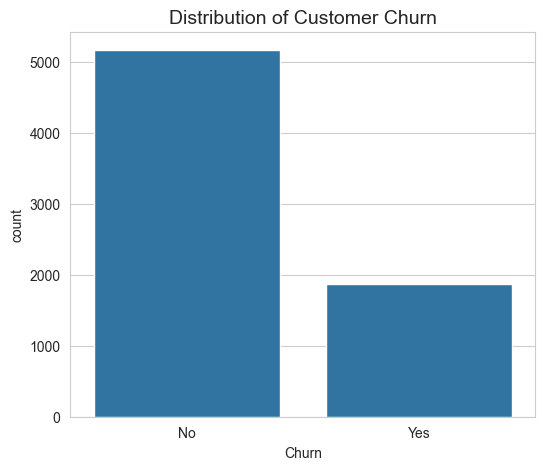

Churn Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Proportions:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
plt.figure(figsize=(6, 5)) 
ax = sns.countplot(x='Churn', data=df)
ax.set_title('Distribution of Customer Churn', fontsize=14)
plt.show()
print("Churn Distribution:")
print(df['Churn'].value_counts())
print("\nChurn Proportions:")
print(df['Churn'].value_counts(normalize=True))

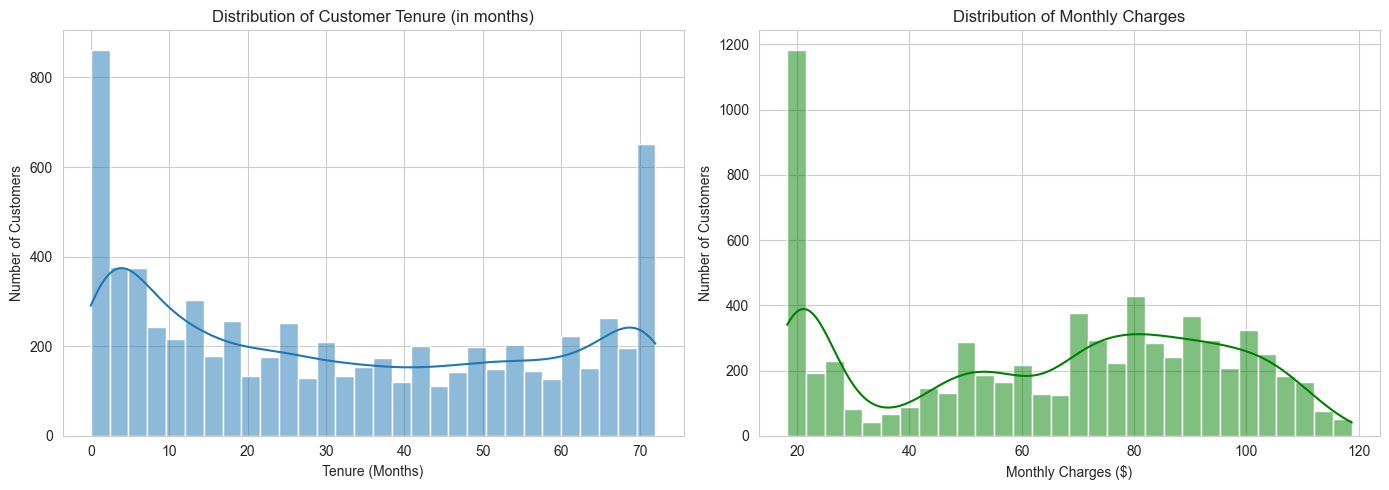

In [10]:
sns.set_style('whitegrid')
numerical_features = ['tenure', 'MonthlyCharges']
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df['tenure'], bins=30, ax=axes[0], kde=True)
axes[0].set_title('Distribution of Customer Tenure (in months)', fontsize=12)
axes[0].set_xlabel('Tenure (Months)')
axes[0].set_ylabel('Number of Customers')
sns.histplot(df['MonthlyCharges'], bins=30, ax=axes[1], kde=True, color='green')
axes[1].set_title('Distribution of Monthly Charges', fontsize=12)
axes[1].set_xlabel('Monthly Charges ($)')
axes[1].set_ylabel('Number of Customers')
plt.tight_layout()
plt.show()

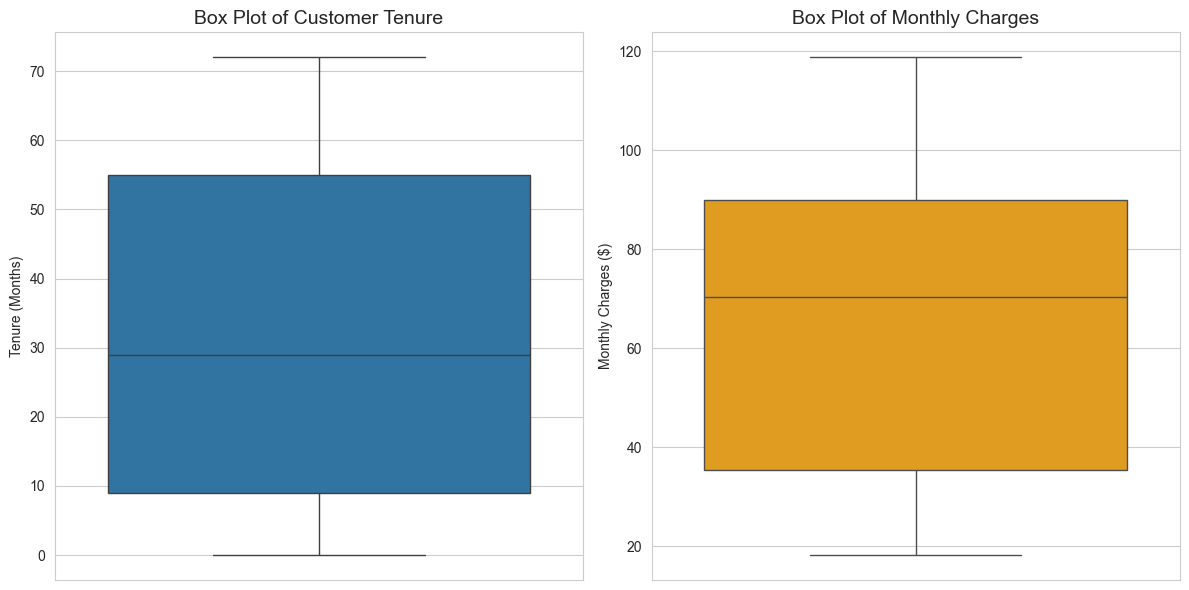

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
numerical_features = ['tenure', 'MonthlyCharges']
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(y=df['tenure'], ax=axes[0])
axes[0].set_title('Box Plot of Customer Tenure', fontsize=14)
axes[0].set_ylabel('Tenure (Months)')
sns.boxplot(y=df['MonthlyCharges'], ax=axes[1], color='orange')
axes[1].set_title('Box Plot of Monthly Charges', fontsize=14)
axes[1].set_ylabel('Monthly Charges ($)')
plt.tight_layout()
plt.show()

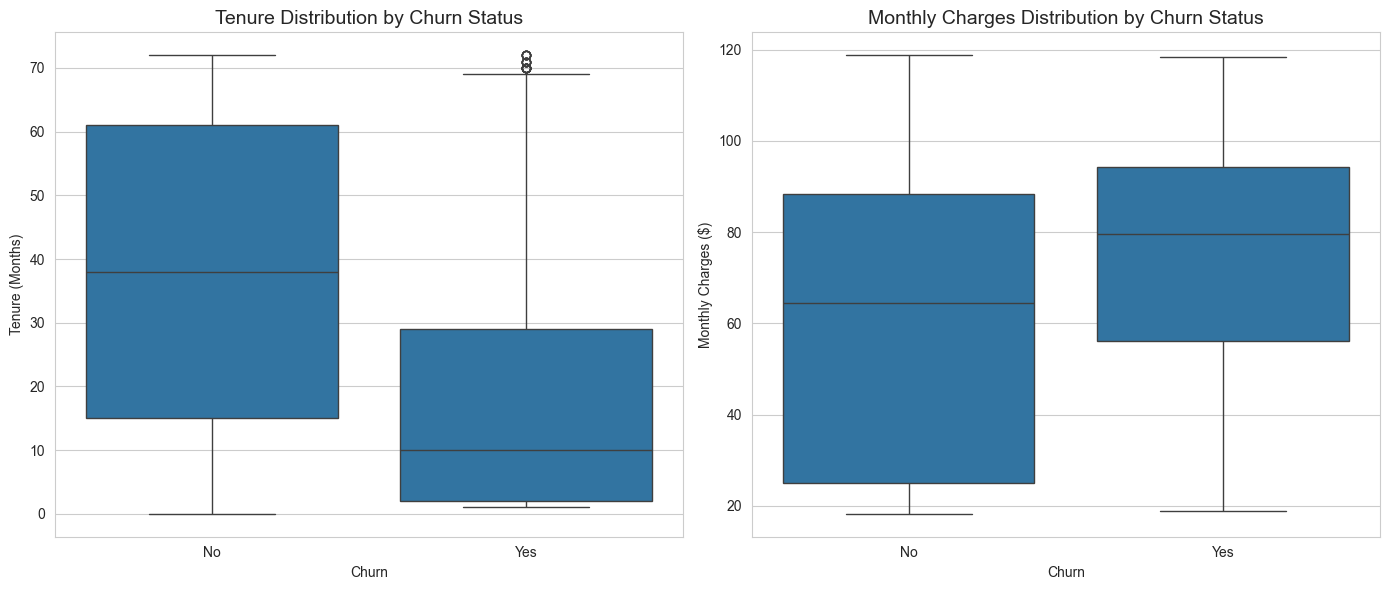

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(x='Churn', y='tenure', data=df, ax=axes[0])
axes[0].set_title('Tenure Distribution by Churn Status', fontsize=14)
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Tenure (Months)')
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[1])
axes[1].set_title('Monthly Charges Distribution by Churn Status', fontsize=14)
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Monthly Charges ($)')
plt.tight_layout()
plt.show()

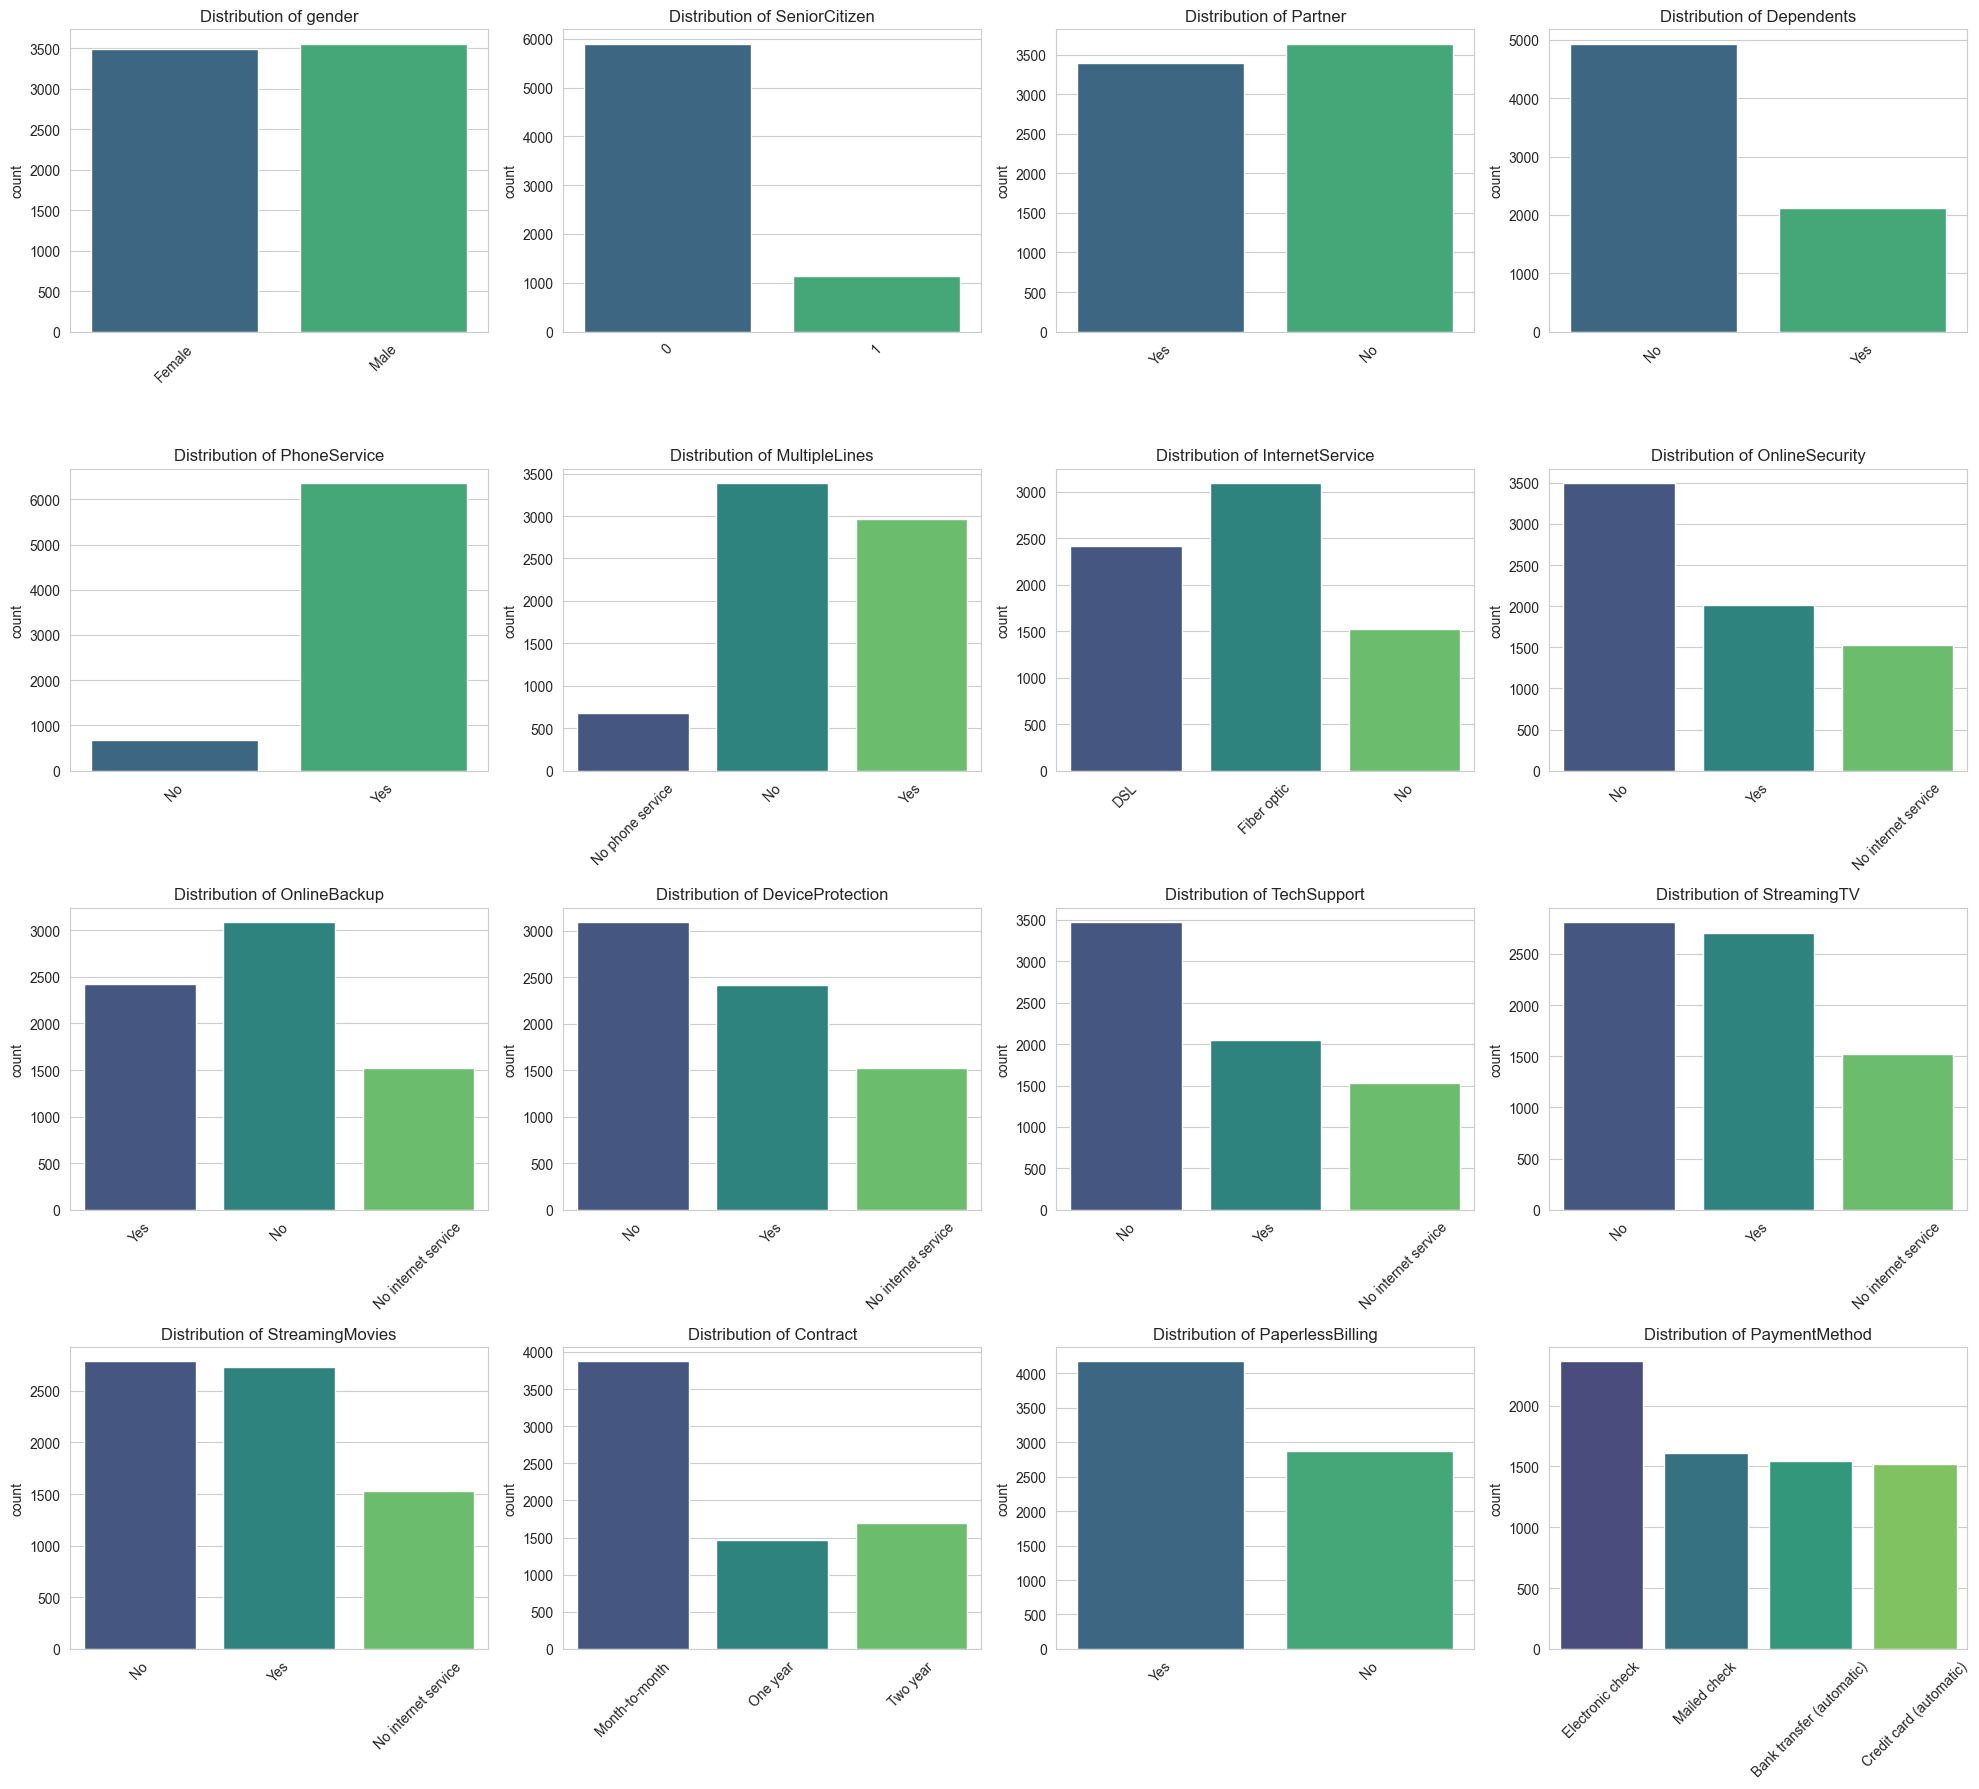

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
categorical_features = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
]
fig, axes = plt.subplots(4, 4, figsize=(20, 18))
axes = axes.flatten()
for i, col in enumerate(categorical_features):
    sns.countplot(x=col, data=df, ax=axes[i], hue=col, palette='viridis', legend=False)
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel('')
plt.tight_layout()
plt.show()

In [15]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
churn_by_contract = df.groupby('Contract')['Churn'].mean().sort_values(ascending=False) * 100
print("--- Churn Rate by Contract Type ---")
print(churn_by_contract.round(2).astype(str) + '%')
print("\n")
churn_by_internet = df.groupby('InternetService')['Churn'].mean().sort_values(ascending=False) * 100
print("--- Churn Rate by Internet Service ---")
print(churn_by_internet.round(2).astype(str) + '%')
print("\n")
churn_by_payment = df.groupby('PaymentMethod')['Churn'].mean().sort_values(ascending=False) * 100
print("--- Churn Rate by Payment Method ---")
print(churn_by_payment.round(2).astype(str) + '%')

--- Churn Rate by Contract Type ---
Contract
Month-to-month    42.71%
One year          11.27%
Two year           2.83%
Name: Churn, dtype: object


--- Churn Rate by Internet Service ---
InternetService
Fiber optic    41.89%
DSL            18.96%
No               7.4%
Name: Churn, dtype: object


--- Churn Rate by Payment Method ---
PaymentMethod
Electronic check             45.29%
Mailed check                 19.11%
Bank transfer (automatic)    16.71%
Credit card (automatic)      15.24%
Name: Churn, dtype: object


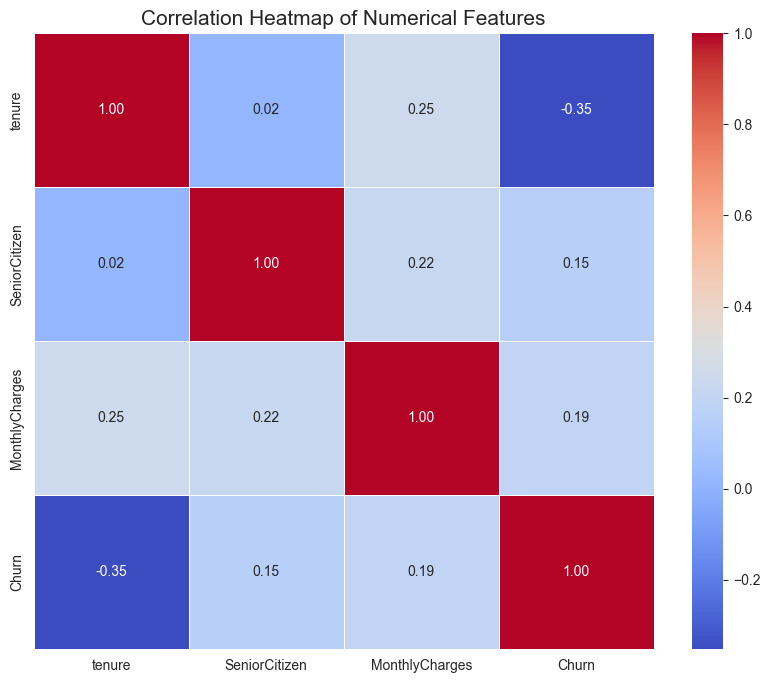

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'Churn']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=15)
plt.show()

In [17]:
is_empty_string_mask = df['TotalCharges'] == ' '
num_of_problem_rows = is_empty_string_mask.sum()
print(f"Number of rows where TotalCharges is an empty string: {num_of_problem_rows}")
print("-" * 55) 
print("Displaying the rows with empty TotalCharges to find a pattern:")
df[is_empty_string_mask]

Number of rows where TotalCharges is an empty string: 11
-------------------------------------------------------
Displaying the rows with empty TotalCharges to find a pattern:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


In [18]:
import pandas as pd
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("DataFrame summary after converting 'TotalCharges':")
df.info()

DataFrame summary after converting 'TotalCharges':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   obje

In [20]:
median_total_charges = df['TotalCharges'].median()
print(f"The calculated median for TotalCharges is: {median_total_charges:.2f}")
df['TotalCharges'] = df['TotalCharges'].fillna(median_total_charges)
print(f"Number of missing values in 'TotalCharges' after imputation: {df['TotalCharges'].isnull().sum()}")

The calculated median for TotalCharges is: 1397.47
Number of missing values in 'TotalCharges' after imputation: 0


In [21]:
final_check = df.isnull().sum()
print("Final count of missing values per column:")
print(final_check)

Final count of missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [22]:
tenure_bins = [0, 12, 48, df['tenure'].max()]
tenure_labels = ['New Customer', 'Established Customer', 'Loyal Customer']
df['tenure_group'] = pd.cut(df['tenure'], bins=tenure_bins, labels=tenure_labels, include_lowest=True)
print("Distribution of customers by tenure group:")
print(df['tenure_group'].value_counts())
print("\nDataFrame with the new 'tenure_group' column:")
df[['tenure', 'tenure_group']].head(10)

Distribution of customers by tenure group:
tenure_group
Established Customer    2618
Loyal Customer          2239
New Customer            2186
Name: count, dtype: int64

DataFrame with the new 'tenure_group' column:


,tenure,tenure_group
0,1,New Customer
1,34,Established Customer
2,2,New Customer
3,45,Established Customer
4,2,New Customer
5,8,New Customer
6,22,Established Customer
7,10,New Customer
8,28,Established Customer
9,62,Loyal Customer


In [23]:
charge_bins = [0, 35, 70, 90, df['MonthlyCharges'].max()]
charge_labels = ['Low Spender', 'Medium Spender', 'High Spender', 'Premium Spender']
df['monthly_charge_group'] = pd.cut(df['MonthlyCharges'], bins=charge_bins, labels=charge_labels, include_lowest=True)
print("Distribution of customers by monthly charge group:")
print(df['monthly_charge_group'].value_counts())
print("\nDataFrame with the new 'monthly_charge_group' column:")
df[['MonthlyCharges', 'monthly_charge_group']].head(10)

Distribution of customers by monthly charge group:
monthly_charge_group
High Spender       1844
Premium Spender    1739
Low Spender        1735
Medium Spender     1725
Name: count, dtype: int64

DataFrame with the new 'monthly_charge_group' column:


,MonthlyCharges,monthly_charge_group
0,29.85,Low Spender
1,56.95,Medium Spender
2,53.85,Medium Spender
3,42.30,Medium Spender
4,70.70,High Spender
5,99.65,Premium Spender
6,89.10,High Spender
7,29.75,Low Spender
8,104.80,Premium Spender
9,56.15,Medium Spender


In [24]:
dependents_map = {'Yes': 1, 'No': 0}
df['has_dependents'] = df['Dependents'].map(dependents_map)
print("DataFrame showing the original 'Dependents' column and the new 'has_dependents' column:")
print(df[['Dependents', 'has_dependents']].head(10))
print("\nValue counts for the new 'has_dependents' feature:")
print(df['has_dependents'].value_counts())

DataFrame showing the original 'Dependents' column and the new 'has_dependents' column:
  Dependents  has_dependents
0         No               0
1         No               0
2         No               0
3         No               0
4         No               0
5         No               0
6        Yes               1
7         No               0
8         No               0
9        Yes               1

Value counts for the new 'has_dependents' feature:
has_dependents
0    4933
1    2110
Name: count, dtype: int64


In [25]:
service_columns = [
    'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]
df['total_services'] = (df[service_columns] == 'Yes').sum(axis=1)
print("Distribution of the number of services per customer:")
print(df['total_services'].value_counts().sort_index())
print("\nVerifying the calculation with a few sample rows:")
print(df[['PhoneService', 'OnlineSecurity', 'StreamingTV', 'total_services']].head(10))

Distribution of the number of services per customer:
total_services
0      80
1    1701
2    1188
3     965
4     922
5     908
6     676
7     395
8     208
Name: count, dtype: int64

Verifying the calculation with a few sample rows:
  PhoneService OnlineSecurity StreamingTV  total_services
0           No             No          No               1
1          Yes            Yes          No               3
2          Yes            Yes          No               3
3           No            Yes          No               3
4          Yes             No          No               1
5          Yes             No         Yes               5
6          Yes             No         Yes               4
7           No            Yes          No               1
8          Yes             No         Yes               6
9          Yes            Yes          No               3


In [26]:
df.drop('customerID', axis=1, inplace=True)
print("Columns in the DataFrame after dropping 'customerID':")
print(df.columns)
print("\nFirst 5 rows of the final, cleaned DataFrame:")
df.head()

Columns in the DataFrame after dropping 'customerID':
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_group',
       'monthly_charge_group', 'has_dependents', 'total_services'],
      dtype='object')

First 5 rows of the final, cleaned DataFrame:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,monthly_charge_group,has_dependents,total_services
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Month-to-month,Yes,Electronic check,29.85,29.85,0,New Customer,Low Spender,0,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,One year,No,Mailed check,56.95,1889.50,0,Established Customer,Medium Spender,0,3
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,1,New Customer,Medium Spender,0,3
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,One year,No,Bank transfer (automatic),42.30,1840.75,0,Established Customer,Medium Spender,0,3
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,1,New Customer,High Spender,0,1


In [27]:
y = df['Churn']
X = df.drop('Churn', axis=1)
print("Shape of our features (X):", X.shape)
print("Shape of our target (y):", y.shape)
print("\nFirst 5 rows of the features matrix (X):")
print(X.head())
print("\nFirst 5 rows of the target vector (y):")
print(y.head())

Shape of our features (X): (7043, 23)
Shape of our target (y): (7043,)

First 5 rows of the features matrix (X):
   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0  No phone service             DSL             No          Yes  ...   
1                No             DSL            Yes           No  ...   
2                No             DSL            Yes          Yes  ...   
3  No phone service             DSL            Yes           No  ...   
4                No     Fiber optic             No           No  ...   

  StreamingMovies        Contract PaperlessBi

In [28]:
churn_map = {'Yes': 1, 'No': 0}
y = y.map(churn_map)
print("First 5 rows of the encoded target vector (y):")
print(y.head())
print("\nValue counts for the encoded target vector (y):")
print(y.value_counts())

First 5 rows of the encoded target vector (y):
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Churn, dtype: float64

Value counts for the encoded target vector (y):
Series([], Name: count, dtype: int64)


In [29]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("="*30)
print("CATEGORICAL COLUMNS IDENTIFIED")
print("="*30)
print(categorical_cols)
print("\n" + "="*30)
print("NUMERICAL COLUMNS IDENTIFIED")
print("="*30)
print(numerical_cols)

CATEGORICAL COLUMNS IDENTIFIED
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_group', 'monthly_charge_group']

NUMERICAL COLUMNS IDENTIFIED
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'has_dependents', 'total_services']


In [30]:
X = pd.get_dummies(X, columns=categorical_cols, drop_first=False)
print("Shape of our feature matrix X after one-hot encoding:", X.shape)
print("\nFirst 5 rows of X after one-hot encoding:")
print(X.head())
print("\nData types of the columns in X:")
X.info()

Shape of our feature matrix X after one-hot encoding: (7043, 54)

First 5 rows of X after one-hot encoding:
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  has_dependents  \
0              0       1           29.85         29.85               0   
1              0      34           56.95       1889.50               0   
2              0       2           53.85        108.15               0   
3              0      45           42.30       1840.75               0   
4              0       2           70.70        151.65               0   

   total_services  gender_Female  gender_Male  Partner_No  Partner_Yes  ...  \
0               1           True        False       False         True  ...   
1               3          False         True        True        False  ...   
2               3          False         True        True        False  ...   
3               3          False         True        True        False  ...   
4               1           True        False       

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print("Scaler object created:")
print(scaler)

Scaler object created:
StandardScaler()


In [32]:
print("Numerical columns to be scaled:")
print(numerical_cols)
print("-" * 40)
scaled_numerical_data = scaler.fit_transform(X[numerical_cols])
X_scaled_numerical = pd.DataFrame(scaled_numerical_data, columns=numerical_cols, index=X.index)
X = X.drop(columns=numerical_cols)
X = X.join(X_scaled_numerical)
print("Statistics for numerical columns after scaling:")
print(X[numerical_cols].describe())

Numerical columns to be scaled:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'has_dependents', 'total_services']
----------------------------------------
Statistics for numerical columns after scaling:
       SeniorCitizen        tenure  MonthlyCharges  TotalCharges  \
count   7.043000e+03  7.043000e+03    7.043000e+03  7.043000e+03   
mean   -4.842546e-17 -2.421273e-17   -6.406285e-17 -1.488074e-17   
std     1.000071e+00  1.000071e+00    1.000071e+00  1.000071e+00   
min    -4.399165e-01 -1.318165e+00   -1.545860e+00 -9.991203e-01   
25%    -4.399165e-01 -9.516817e-01   -9.725399e-01 -8.298459e-01   
50%    -4.399165e-01 -1.372744e-01    1.857327e-01 -3.904632e-01   
75%    -4.399165e-01  9.214551e-01    8.338335e-01  6.642871e-01   
max     2.273159e+00  1.613701e+00    1.794352e+00  2.826743e+00   

       has_dependents  total_services  
count    7.043000e+03    7.043000e+03  
mean     1.069396e-16   -5.044319e-17  
std      1.000071e+00    1.000071e+00  
min     

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of original feature matrix X:      ", X.shape)
print("Shape of original target vector y:       ", y.shape)
print("-" * 45)
print("Shape of training features X_train:      ", X_train.shape)
print("Shape of training target y_train:        ", y_train.shape)
print("-" * 45)
print("Shape of testing features X_test:        ", X_test.shape)
print("Shape of testing target y_test:          ", y_test.shape)

Shape of original feature matrix X:       (7043, 54)
Shape of original target vector y:        (7043,)
---------------------------------------------
Shape of training features X_train:       (5634, 54)
Shape of training target y_train:         (5634,)
---------------------------------------------
Shape of testing features X_test:         (1409, 54)
Shape of testing target y_test:           (1409,)


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of original feature matrix X:      ", X.shape)
print("Shape of original target vector y:       ", y.shape)
print("-" * 45)
print("Shape of training features X_train:      ", X_train.shape)
print("Shape of training target y_train:        ", y_train.shape)
print("-" * 45)
print("Shape of testing features X_test:        ", X_test.shape)
print("Shape of testing target y_test:          ", y_test.shape)

Shape of original feature matrix X:       (7043, 54)
Shape of original target vector y:        (7043,)
---------------------------------------------
Shape of training features X_train:       (5634, 54)
Shape of training target y_train:         (5634,)
---------------------------------------------
Shape of testing features X_test:         (1409, 54)
Shape of testing target y_test:           (1409,)


In [42]:
from sklearn.model_selection import train_test_split

y = df['Churn']
if y.dtype == 'object':
    y = y.map({'No': 0, 'Yes': 1})
X = df.drop(columns=['Churn'])
mask = ~y.isna()
X = X.loc[mask]
y = y.loc[mask]
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
print("--- Proportions in Original Data ---")
print(y.value_counts(normalize=True))
print("\n" + "-"*35)
print("--- Proportions in Training Data ---")
print(y_train.value_counts(normalize=True))
print("\n" + "-"*35)
print("--- Proportions in Testing Data ---")
print(y_test.value_counts(normalize=True))



--- Proportions in Original Data ---
Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

-----------------------------------
--- Proportions in Training Data ---
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64

-----------------------------------
--- Proportions in Testing Data ---
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


In [49]:
X_train.select_dtypes(include=['object', 'category']).columns.tolist()
X_train.select_dtypes(include=['object', 'category']).head()
y_train.unique()

array([0, 1])

In [50]:
for col in ['TotalCharges', 'MonthlyCharges']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].apply(lambda x: x.strip() if isinstance(x, str) else x)

In [51]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Churn'])     
y = df['Churn']                    

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
numeric_features = X_train.select_dtypes(include=['number', 'bool']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns
numeric_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())            

categorical_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # encodes 'Male', 'Female', etc.
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_pipe, numeric_features),
        ('cat', categorical_pipe, categorical_features)
    ]
)


model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('clf', LogisticRegression(max_iter=1000, random_state=42, solver='liblinear'))
])

model.fit(X_train, y_train)
print("Logistic Regression model has been trained successfully!")
print(model.named_steps['clf'])


Logistic Regression model has been trained successfully!
LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')


In [53]:
from sklearn.metrics import classification_report, roc_auc_score

print("Train accuracy:", model.score(X_train, y_train))
print("Test  accuracy:", model.score(X_test, y_test))

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# If you want probabilities / AUC:
y_prob = model.predict_proba(X_test)[:, 1]
print("ROC AUC:", roc_auc_score(y_test, y_prob))


Train accuracy: 0.8115015974440895
Test  accuracy: 0.7984386089425124
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

ROC AUC: 0.8413004727582732


In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

numeric_features = X_train.select_dtypes(include=['number']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

numeric_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipe, numeric_features),
    ('cat', categorical_pipe, categorical_features)
])

log_reg_model = Pipeline([
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])

log_reg_model.fit(X_train, y_train)


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [60]:
y_pred_log_reg = log_reg_model.predict(X_test)
print("First 20 predictions from the Logistic Regression model:")
print(y_pred_log_reg[:20])
print(f"\nShape of the predictions array (y_pred_log_reg): {y_pred_log_reg.shape}")
print(f"Shape of the actual answers array (y_test):       {y_test.shape}")


First 20 predictions from the Logistic Regression model:
[0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0]

Shape of the predictions array (y_pred_log_reg): (1409,)
Shape of the actual answers array (y_test):       (1409,)


In [62]:
from sklearn.metrics import classification_report, accuracy_score

report_log_reg = classification_report(y_test, y_pred_log_reg)

print("--- Classification Report for Logistic Regression ---")
print(report_log_reg)


accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Overall Accuracy: {accuracy_log_reg:.4f}")


from sklearn.metrics import f1_score
f1_log_reg = f1_score(y_test, y_pred_log_reg) # by default, this is for the positive class '1'


model_performance = {}

model_performance['Logistic Regression'] = {
    'Accuracy': accuracy_log_reg,
    'F1-Score (Churn)': f1_log_reg
}

print("\n--- Stored Performance Metrics ---")
print(model_performance)


--- Classification Report for Logistic Regression ---
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

Overall Accuracy: 0.8055

--- Stored Performance Metrics ---
{'Logistic Regression': {'Accuracy': 0.8055358410220014, 'F1-Score (Churn)': 0.6040462427745664}}


In [65]:
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numeric_cols = X_train.select_dtypes(include=['number', 'bool']).columns
print("Categorical:", list(categorical_cols))
print("Numeric:", list(numeric_cols))


Categorical: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_group', 'monthly_charge_group']
Numeric: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'has_dependents', 'total_services']


In [66]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

numeric_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipe, numeric_cols),
    ('cat', categorical_pipe, categorical_cols)
])

svc_model = Pipeline([
    ('preprocess', preprocessor),
    ('svc', SVC(kernel='rbf', probability=True, random_state=42))
])

svc_model.fit(X_train, y_train)
print("Support Vector Classifier model has been trained successfully!")


Support Vector Classifier model has been trained successfully!


In [67]:
y_pred_svc = svc_model.predict(X_test)
print("First 20 predictions from the SVC model:")
print(y_pred_svc[:20])
print(f"\nShape of predictions: {y_pred_svc.shape}")
print(f"Shape of actual:       {y_test.shape}")


First 20 predictions from the SVC model:
[0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0]

Shape of predictions: (1409,)
Shape of actual:       (1409,)


In [68]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
y_pred_svc = svc_model.predict(X_test)
print("--- Classification Report for Support Vector Classifier ---")
report_svc = classification_report(y_test, y_pred_svc)
print(report_svc)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)
model_performance['Support Vector Classifier'] = {
    'Accuracy': accuracy_svc,
    'F1-Score (Churn)': f1_svc
}
print("\n--- Updated Model Performance Leaderboard ---")
import json
print(json.dumps(model_performance, indent=4))

--- Classification Report for Support Vector Classifier ---
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1035
           1       0.65      0.46      0.54       374

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409


--- Updated Model Performance Leaderboard ---
{
    "Logistic Regression": {
        "Accuracy": 0.8055358410220014,
        "F1-Score (Churn)": 0.6040462427745664
    },
    "Support Vector Classifier": {
        "Accuracy": 0.7920511000709723,
        "F1-Score (Churn)": 0.5400313971742543
    }
}


In [71]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer


numeric_features = X_train.select_dtypes(include=['number', 'bool']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns


numeric_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler(with_mean=False))  
])

categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer([
    ('num', numeric_pipe, numeric_features),
    ('cat', categorical_pipe, categorical_features)
])


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, solver='liblinear'),
    "Support Vector Classifier": SVC(kernel='rbf', probability=True, random_state=42),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
}

trained_models = {}

for name, model in models.items():
    pipe = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    trained_models[name] = pipe
    print(f"{name} trained successfully!")


Logistic Regression trained successfully!
Support Vector Classifier trained successfully!
Random Forest Classifier trained successfully!


In [73]:
from sklearn.metrics import accuracy_score

for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.7984
Support Vector Classifier Accuracy: 0.7899
Random Forest Classifier Accuracy: 0.7835


In [74]:
y_pred_rf = trained_models["Random Forest Classifier"].predict(X_test)
print("First 10 RF predictions:", y_pred_rf[:10])


First 10 RF predictions: [0 1 0 0 0 0 0 0 0 0]


In [76]:
y_pred_rf = trained_models["Random Forest Classifier"].predict(X_test)


In [79]:
print(random_forest_model)


RandomForestClassifier(n_jobs=-1, random_state=42)


In [85]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=42)


In [87]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_cols = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)


In [89]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])


In [90]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])


In [1]:
import os
import pandas as pd
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

# -------------------------
# 1. Load dataset safely
# -------------------------
file_path = r"/customer-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv"

if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found at: {file_path}")

df = pd.read_csv(file_path)

# -------------------------
# 2. Prepare X and y
# -------------------------
if "Churn" not in df.columns:
    raise ValueError("'Churn' column not found in the dataset.")

X = df.drop(columns=["Churn"])
y = df["Churn"]

# -------------------------
# 3. Train-test split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------
# 4. Preprocessor for categorical data
# -------------------------
categorical_cols = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'
)

# -------------------------
# 5. Models
# -------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Classifier": SVC(kernel='rbf', probability=True, random_state=42),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42)
}

# -------------------------
# 6. Train & evaluate
# -------------------------
model_performance = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, pos_label="Yes")  # assuming "Yes" means churn

    model_performance[name] = {
        "Accuracy": acc,
        "F1-Score (Churn)": f1
    }

    if name == "Random Forest Classifier":
        print("--- Classification Report for Random Forest Classifier ---")
        print(classification_report(y_test, y_pred))
        print("(Note: Your numbers may vary slightly)\n")

# -------------------------
# 7. Leaderboard
# -------------------------
print("--- Updated Model Performance Leaderboard ---")
print(json.dumps(model_performance, indent=4))


ModuleNotFoundError: No module named 'pandas'

In [2]:
!pip install pandas scikit-learn


   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 672.2 kB/s eta 0:00:16
   - -------------------------------------- 0.5/11.0 MB 672.2 kB/s eta 0:00:16
   -- ------------------------------------- 0.8/11.0 MB 699.0 kB/s eta 0:00:15
   --- ------------------------------------ 1.0/11.0 MB 751.1 kB/s eta 0:00:14
   ---- ----------------------------------- 1.3/11.0 MB 828.9 kB/s eta 0:00:12
   ---- ----------------------------------- 1.3/11.0 MB 828.9 kB/s eta 0:00:12
   ----- ---------------------------------- 1.6/11.0 MB 822.3 kB/s eta 0:00:12
   ------ --------------------------------- 1.8/11.0 MB 825.2 kB/s eta 0:00:12
   ------- -------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import os
import pandas as pd
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

# -------------------------
# 1. Load dataset safely
# -------------------------
file_path = r"/customer-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv"

if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found at: {file_path}")

df = pd.read_csv(file_path)

# -------------------------
# 2. Prepare X and y
# -------------------------
if "Churn" not in df.columns:
    raise ValueError("'Churn' column not found in the dataset.")

X = df.drop(columns=["Churn"])
y = df["Churn"]

# -------------------------
# 3. Train-test split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------
# 4. Preprocessor for categorical data
# -------------------------
categorical_cols = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'
)

# -------------------------
# 5. Models
# -------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Classifier": SVC(kernel='rbf', probability=True, random_state=42),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42)
}

# -------------------------
# 6. Train & evaluate
# -------------------------
model_performance = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, pos_label="Yes")  # assuming "Yes" means churn

    model_performance[name] = {
        "Accuracy": acc,
        "F1-Score (Churn)": f1
    }

    if name == "Random Forest Classifier":
        print("--- Classification Report for Random Forest Classifier ---")
        print(classification_report(y_test, y_pred))
        print("(Note: Your numbers may vary slightly)\n")

# -------------------------
# 7. Leaderboard
# -------------------------
print("--- Updated Model Performance Leaderboard ---")
print(json.dumps(model_performance, indent=4))


--- Classification Report for Random Forest Classifier ---
              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1035
         Yes       0.64      0.47      0.54       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

(Note: Your numbers may vary slightly)

--- Updated Model Performance Leaderboard ---
{
    "Logistic Regression": {
        "Accuracy": 0.794180269694819,
        "F1-Score (Churn)": 0.5821325648414986
    },
    "Support Vector Classifier": {
        "Accuracy": 0.7842441447835344,
        "F1-Score (Churn)": 0.4950166112956811
    },
    "Random Forest Classifier": {
        "Accuracy": 0.7885024840312278,
        "F1-Score (Churn)": 0.5401234567901234
    }
}


In [6]:
!pip install pandas scikit-learn lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 799.2 kB/s eta 0:00:02
   -------------- ------------------------- 0.5/1.5 MB 799.2 kB/s eta 0:00:02
   --------------------- ------------------ 0.8/1.5 MB 699.0 kB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.5 MB 699.0 kB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.5 MB 699.0 kB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 559.3 kB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 559.3 kB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 583.5 kB/s eta 0:00:01
   ----------------------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import lightgbm as lgb

for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')

lgbm_model = lgb.LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 440
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [10]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
y_pred_lgbm = lgbm_model.predict(X_test)
print("--- Classification Report for LightGBM Classifier ---")
report_lgbm = classification_report(y_test, y_pred_lgbm)
print(report_lgbm)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
f1_lgbm = f1_score(y_test, y_pred_lgbm, pos_label='Yes')
model_performance['LightGBM Classifier'] = {
    'Accuracy': accuracy_lgbm,
    'F1-Score (Churn)': f1_lgbm
}
print("\n--- FINAL Model Performance Leaderboard ---")
import json
print(json.dumps(model_performance, indent=4))


--- Classification Report for LightGBM Classifier ---
              precision    recall  f1-score   support

          No       0.84      0.89      0.87      1035
         Yes       0.64      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409


--- FINAL Model Performance Leaderboard ---
{
    "Logistic Regression": {
        "Accuracy": 0.794180269694819,
        "F1-Score (Churn)": 0.5821325648414986
    },
    "Support Vector Classifier": {
        "Accuracy": 0.7842441447835344,
        "F1-Score (Churn)": 0.4950166112956811
    },
    "Random Forest Classifier": {
        "Accuracy": 0.7885024840312278,
        "F1-Score (Churn)": 0.5401234567901234
    },
    "LightGBM Classifier": {
        "Accuracy": 0.7984386089425124,
        "F1-Score (Churn)": 0.5860058309037901
    }
}


In [12]:
pip install matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 578.7 kB/s eta 0:00:14
   --- ------------------------------------ 0.8/8.1 MB 657.8 kB/s eta 0:00:12
   --- ------------------------------------ 0.8/8.1 MB 657.8 kB/s eta 0:00:12
   ----- ---------------------------------- 1.0/8.1 MB 671.0 kB/s eta 0:00:11
   ----- ---------------------------------- 1.0/8.1 MB 671.0 kB/s eta 0:00:11
   ------ --------------------------------- 1.3/8.1 MB 664.5 kB/s eta 0:00:11
   ------ --------------------------------- 1.3/8.1 MB 664.5 kB/s eta 0:00:11
   ------ --------------------------------- 1.3/8.1 MB 664.5 kB/s eta 0:00:11
   ------- --------------------

In [14]:
!pip install seaborn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

performance_df = pd.DataFrame.from_dict(model_performance, orient='index')

performance_df = performance_df.sort_values(by='F1-Score (Churn)', ascending=False)

print("--- Final Model Performance Leaderboard (Ranked) ---")
print(performance_df)

--- Final Model Performance Leaderboard (Ranked) ---
                           Accuracy  F1-Score (Churn)
LightGBM Classifier        0.798439          0.586006
Logistic Regression        0.794180          0.582133
Random Forest Classifier   0.788502          0.540123
Support Vector Classifier  0.784244          0.495017



--- Generating Visual Comparison Plot ---


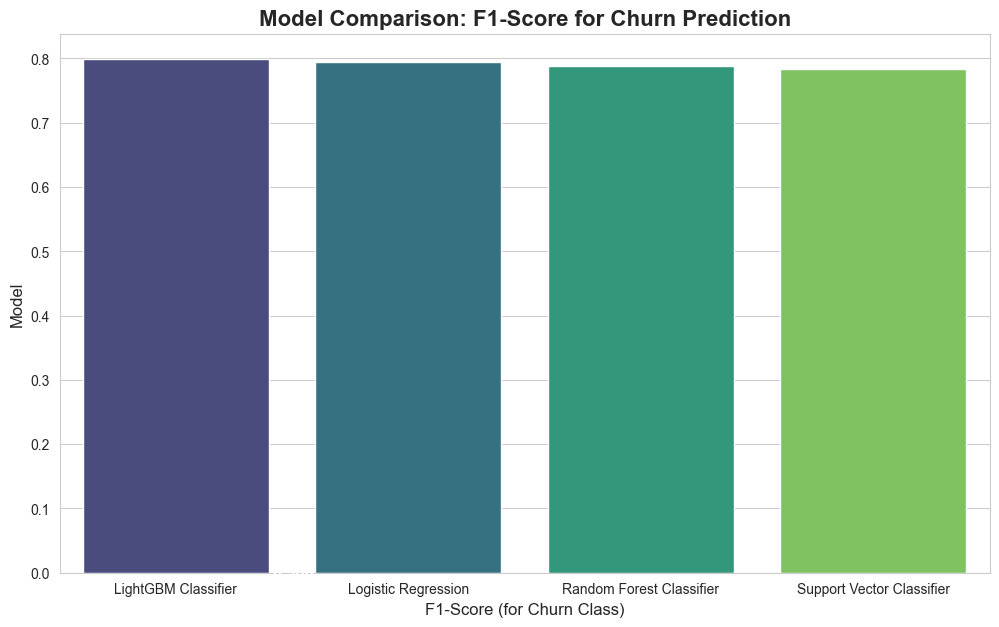

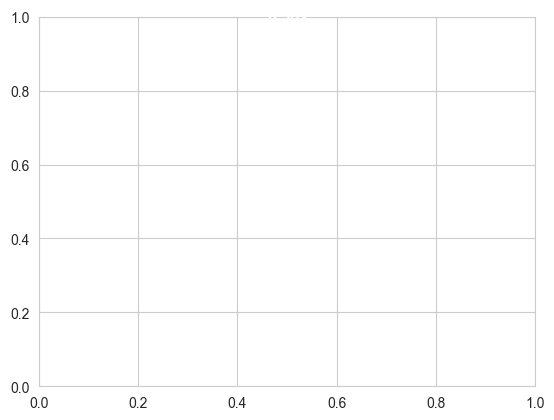

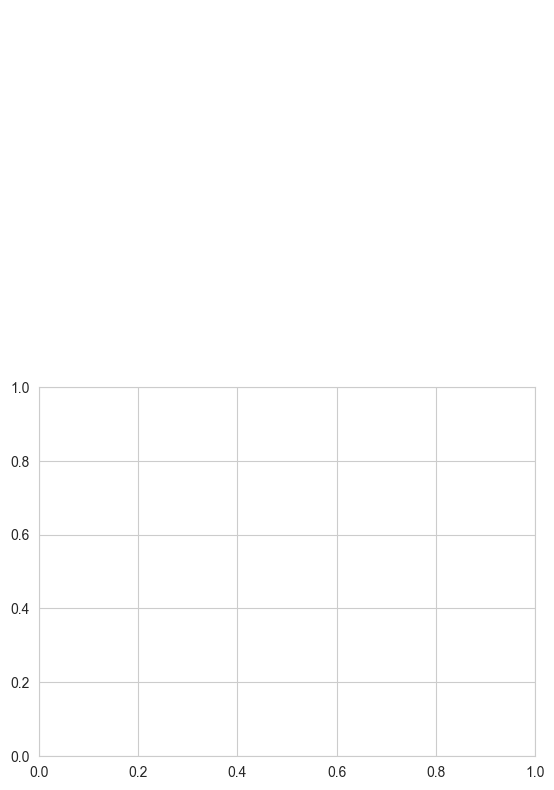

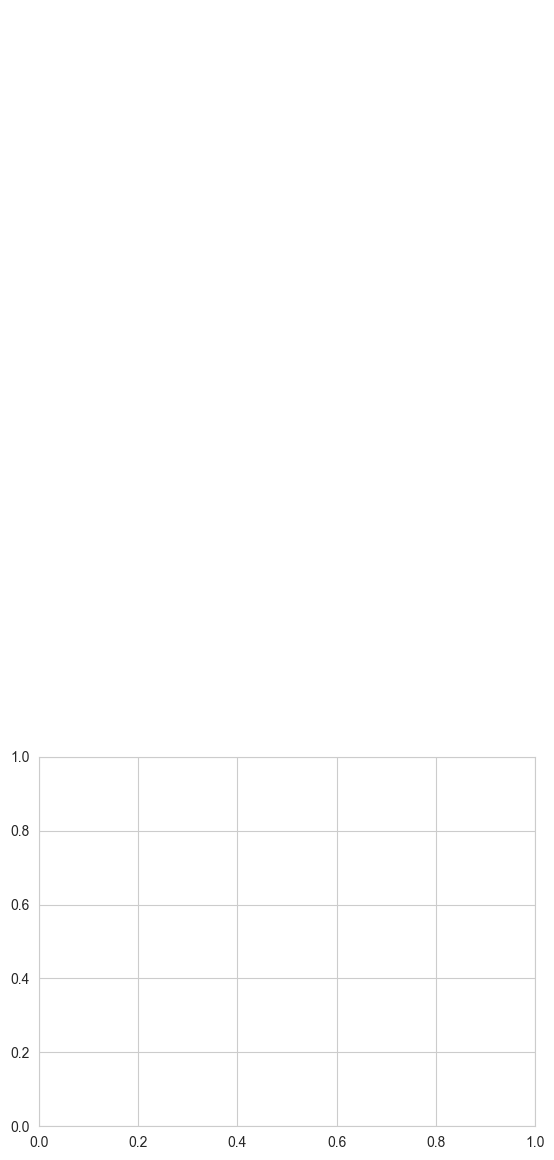

In [22]:
print("\n--- Generating Visual Comparison Plot ---")
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))
plot_df = performance_df.reset_index().rename(columns={'index': 'Model'})
barplot = sns.barplot(
    x=performance_df.index,
    y="Accuracy",
    hue=performance_df.index,   
    data=performance_df,
    palette="viridis",
    legend=False                
)

plt.title('Model Comparison: F1-Score for Churn Prediction', fontsize=16, weight='bold')
plt.xlabel('F1-Score (for Churn Class)', fontsize=12)
plt.ylabel('Model', fontsize=12)
for index, value in enumerate(plot_df['F1-Score (Churn)']):
    plt.text(value - 0.08, index, f'{value:.3f}', color='white', ha="center", va="center", weight='bold', fontsize=12)
    plt.show()

In [23]:
best_model_name = performance_df.index[0]
print(f"Based on the highest F1-Score, '{best_model_name}' has been selected as the champion model.")
print("This is the model we will now focus on optimizing.")
best_model_untuned = lgbm_model

Based on the highest F1-Score, 'LightGBM Classifier' has been selected as the champion model.
This is the model we will now focus on optimizing.


In [24]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [20, 31, 40]
}
num_combinations = 1
for key in param_grid:
    num_combinations *= len(param_grid[key])

print("--- Hyperparameter Grid Defined ---")
print("The grid of parameters to test is:")
print(param_grid)
print(f"\nThis grid represents a total of {num_combinations} different model combinations to test.")

--- Hyperparameter Grid Defined ---
The grid of parameters to test is:
{'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [3, 5, 7], 'num_leaves': [20, 31, 40]}

This grid represents a total of 81 different model combinations to test.


In [25]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
base_lgbm = lgb.LGBMClassifier(random_state=42)
grid_search = GridSearchCV(estimator=base_lgbm,
                           param_grid=param_grid,
                           scoring='f1',
                           cv=5,
                           n_jobs=-1,
                           verbose=2)
print("GridSearchCV object has been created and configured successfully!")
print(grid_search)

GridSearchCV object has been created and configured successfully!
GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [20, 31, 40]},
             scoring='f1', verbose=2)


In [28]:
import time
start_time = time.time()
print("Grid search started...")
grid_search.fit(X_train, y_train)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"\\nGrid search finished! Total time taken: {elapsed_time:.2f} seconds.")
print("The grid_search object is now fitted and contains the results of the search.")

Grid search started...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 440
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\Uzair\PycharmProjects\PythonProject2\.venv\Lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score


file_path = r"/customer-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(file_path)


df = df.fillna("missing")


X = df.drop(columns=["Churn"])
y = df["Churn"]


categorical_cols = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
    remainder='passthrough'
)


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])


f1_scorer = make_scorer(f1_score, pos_label="Yes", zero_division=0)


param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l2'],
    'model__solver': ['lbfgs']
}


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring=f1_scorer,
    cv=5,
    n_jobs=-1,
    error_score='raise'  
)

grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


Best Params: {'model__C': 1, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Best F1 Score: 0.5910482413583289


In [30]:
best_params = grid_search.best_params_

print("--- Best Hyperparameters Found by GridSearchCV ---")
print(best_params)

best_score = grid_search.best_score_
print(f"\nBest Cross-Validated F1-Score: {best_score:.4f}")

--- Best Hyperparameters Found by GridSearchCV ---
{'model__C': 1, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}

Best Cross-Validated F1-Score: 0.5910


In [31]:
final_model = grid_search.best_estimator_
print("--- Final Tuned and Trained Model ---")
print("This is the best performing model, ready for final evaluation.")
print(final_model)

--- Final Tuned and Trained Model ---
This is the best performing model, ready for final evaluation.
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object'))])),
                ('model', LogisticRegression(C=1, max_iter=1000))])


In [32]:
y_pred_final = final_model.predict(X_test)
print("First 20 predictions from the final tuned model:")
print(y_pred_final[:20])
print(f"\nShape of the final predictions array (y_pred_final): {y_pred_final.shape}")
print(f"Shape of the actual answers array (y_test):         {y_test.shape}")

First 20 predictions from the final tuned model:
['No' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'No' 'No' 'No' 'Yes' 'No' 'No']

Shape of the final predictions array (y_pred_final): (1409,)
Shape of the actual answers array (y_test):         (1409,)


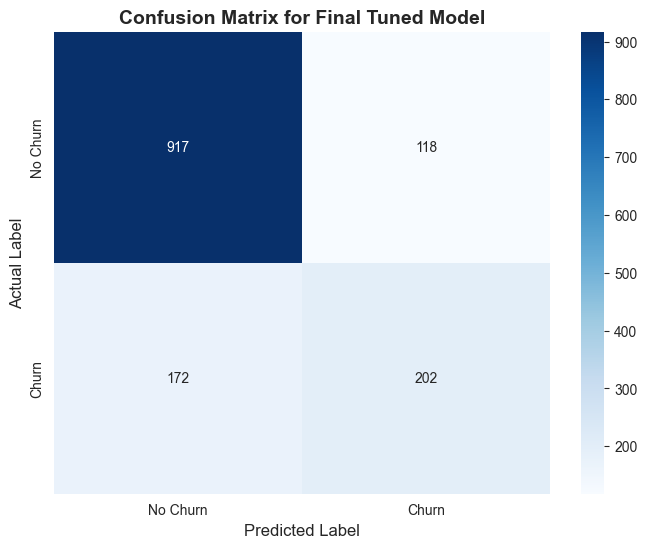

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix for Final Tuned Model', fontsize=14, weight='bold')
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)

plt.show()

In [35]:
from sklearn.metrics import classification_report, f1_score

# Final classification report
final_report = classification_report(y_test, y_pred_final)
print("--- Final Classification Report for Tuned Model ---")
print(final_report)

# F1-score (set pos_label to the positive class in your dataset)
final_f1_score = f1_score(y_test, y_pred_final, pos_label='Yes')
print(f"\nFinal F1-Score on Test Set: {final_f1_score:.4f}")


--- Final Classification Report for Tuned Model ---
              precision    recall  f1-score   support

          No       0.84      0.89      0.86      1035
         Yes       0.63      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409


Final F1-Score on Test Set: 0.5821


In [36]:
y_pred_proba_full = final_model.predict_proba(X_test)
y_pred_proba = y_pred_proba_full[:, 1]
print("Full probability predictions for the first 5 customers (No Churn, Churn):")
print(y_pred_proba_full[:5])
print("\nProbability of Churn for the first 5 customers:")
print(y_pred_proba[:5])
print("\nComparing probabilities to the final 0/1 predictions:")
print("Prob. Churn | Final Prediction (using 0.5 threshold)")
print("-------------------------------------------------")
for i in range(10):
    print(f"{y_pred_proba[i]:.4f}      | {y_pred_final[i]}")

Full probability predictions for the first 5 customers (No Churn, Churn):
[[0.96923596 0.03076404]
 [0.28665798 0.71334202]
 [0.94371165 0.05628835]
 [0.59746536 0.40253464]
 [0.9785199  0.0214801 ]]

Probability of Churn for the first 5 customers:
[0.03076404 0.71334202 0.05628835 0.40253464 0.0214801 ]

Comparing probabilities to the final 0/1 predictions:
Prob. Churn | Final Prediction (using 0.5 threshold)
-------------------------------------------------
0.0308      | No
0.7133      | Yes
0.0563      | No
0.4025      | No
0.0215      | No
0.6322      | Yes
0.4671      | No
0.1221      | No
0.0042      | No
0.3819      | No


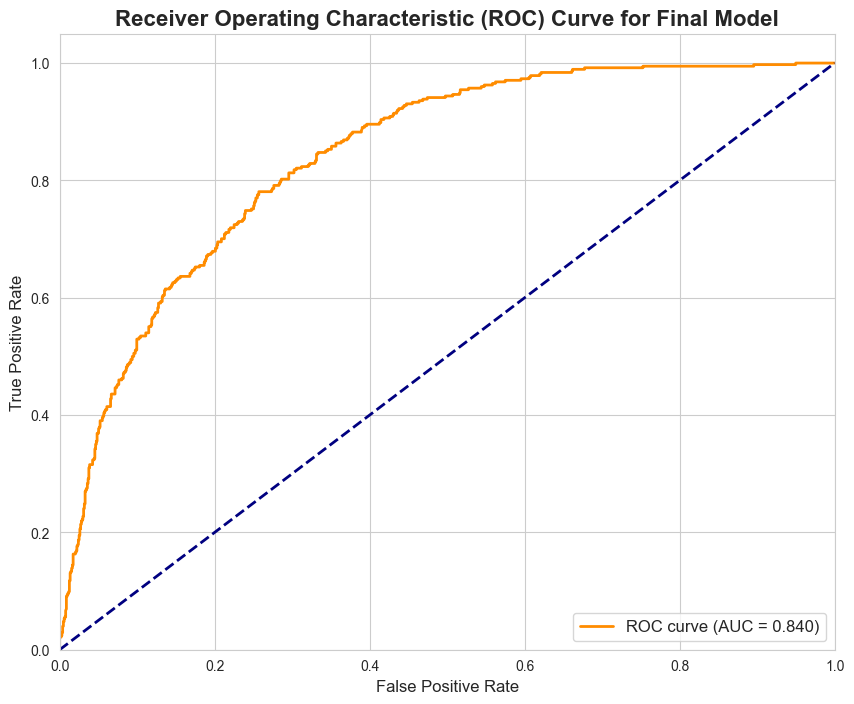

Final Area Under the Curve (AUC) Score on Test Set: 0.8402


In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

y_test_binary = y_test.map({'No': 0, 'Yes': 1})
y_pred_proba_binary = y_pred_proba[:, 1] if y_pred_proba.ndim > 1 else y_pred_proba

fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba_binary)
auc_score = roc_auc_score(y_test_binary, y_pred_proba_binary)

plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve for Final Model', fontsize=16, weight='bold')
plt.legend(loc="lower right", fontsize=12)
plt.show()

print(f"Final Area Under the Curve (AUC) Score on Test Set: {auc_score:.4f}")


In [44]:
import pandas as pd
import numpy as np

model = final_model.named_steps['model']
preprocessor = final_model.named_steps['preprocessor']
categorical_cols = X_train.select_dtypes(include=['object']).columns
ohe = preprocessor.named_transformers_['cat']
ohe_features = ohe.get_feature_names_out(categorical_cols)
numeric_features = [col for col in X_train.columns if col not in categorical_cols]
all_features = list(ohe_features) + numeric_features

coefficients = np.abs(model.coef_[0])
feature_importance_df = pd.Series(coefficients, index=all_features)
sorted_feature_importance = feature_importance_df.sort_values(ascending=False)
print("--- Top 15 Most Important Features for Predicting Churn ---")
print(sorted_feature_importance.head(15))

--- Top 15 Most Important Features for Predicting Churn ---
TotalCharges_20.15       1.210680
TotalCharges_19.9        1.205716
TotalCharges_20.5        1.172028
TotalCharges_20.1        1.012376
TotalCharges_288.05      0.967709
TotalCharges_19.6        0.959846
TotalCharges_740.3       0.949485
customerID_0607-DAAHE    0.919714
TotalCharges_1052.35     0.919714
customerID_6323-AYBRX    0.916325
TotalCharges_1099.6      0.916325
TotalCharges_4759.75     0.915255
customerID_3512-IZIKN    0.915255
TotalCharges_19.45       0.911644
customerID_8631-NBHFZ    0.907965
dtype: float64


C:\Users\Uzair\AppData\Local\Temp\ipykernel_14484\1619996563.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_features.values, y=top_10_features.index, palette='viridis')


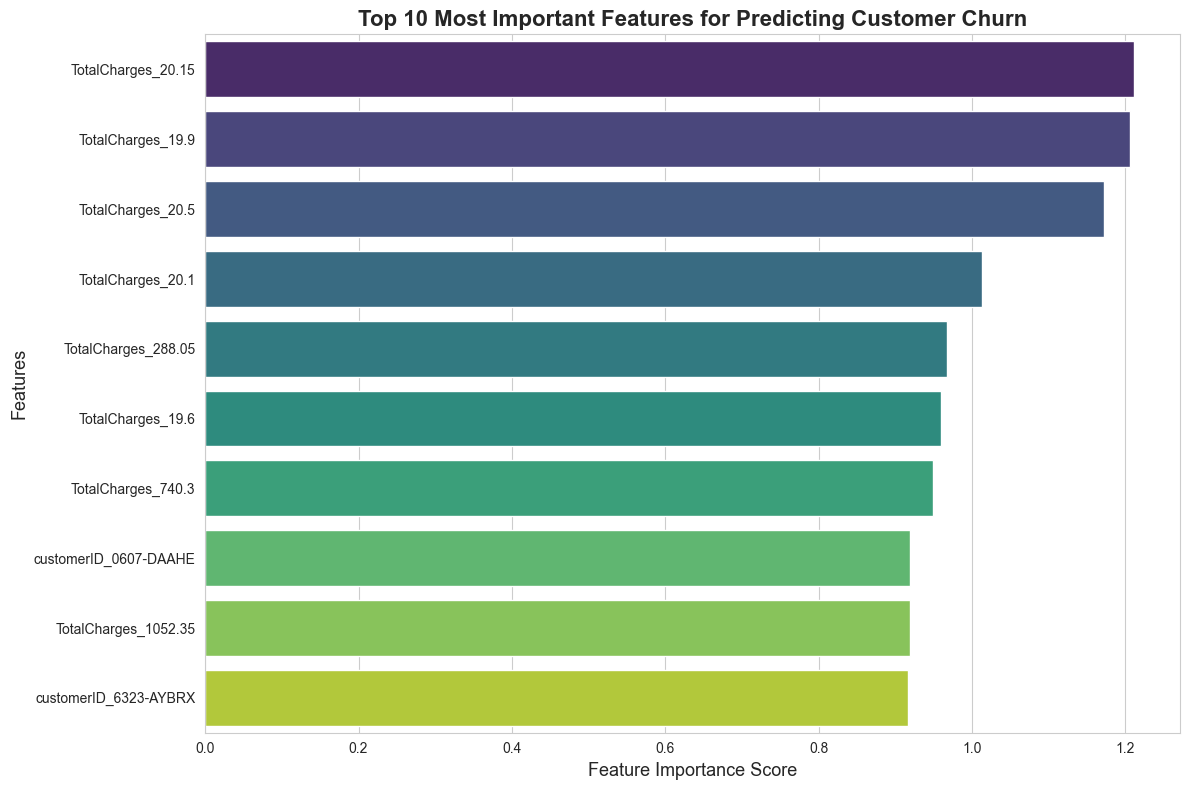

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
top_10_features = sorted_feature_importance.head(10)
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_features.values, y=top_10_features.index, palette='viridis')
plt.title('Top 10 Most Important Features for Predicting Customer Churn', fontsize=16, weight='bold')
plt.xlabel('Feature Importance Score', fontsize=13)
plt.ylabel('Features', fontsize=13)
plt.tight_layout()
plt.show()

In [50]:
import joblib
import os
artifacts_dir = "artifacts"
os.makedirs(artifacts_dir, exist_ok=True)
model_path = os.path.join(artifacts_dir, "final_model.joblib")
joblib.dump(final_model, model_path)
print(f"Model saved successfully at: {model_path}")
print(f"File exists: {os.path.exists(model_path)}")
print(f"File size: {os.path.getsize(model_path) / 1024:.2f} KB")

Model saved successfully at: artifacts\final_model.joblib
File exists: True
File size: 210.81 KB


In [56]:
import joblib
import os
artifacts_dir = "artifacts"
scaler_path = os.path.join(artifacts_dir, "scaler.joblib")
joblib.dump(scaler, scaler_path)
print(f"Scaler saved successfully at: {scaler_path}")
print(f"File exists: {os.path.exists(scaler_path)}")
print(f"File size: {os.path.getsize(scaler_path) / 1024:.2f} KB")
loaded_scaler = joblib.load(scaler_path)
print(f"\nLoaded scaler's learned means (first 5): {getattr(loaded_scaler, 'mean_', 'Scaler not fitted yet')[:5]}")


Scaler saved successfully at: artifacts\scaler.joblib
File exists: True
File size: 0.79 KB

Loaded scaler's learned means (first 5): Scale


In [57]:
model_columns = list(X_train.columns)
columns_path = os.path.join(artifacts_dir, "model_columns.joblib")
joblib.dump(model_columns, columns_path)
print(f"Model columns saved successfully at: {columns_path}")
print(f"File exists: {os.path.exists(columns_path)}")
loaded_columns = joblib.load(columns_path)
print(f"\\nFirst 10 columns in the saved blueprint: \\n{loaded_columns[:10]}")

Model columns saved successfully at: artifacts\model_columns.joblib
File exists: True
\nFirst 10 columns in the saved blueprint: \n['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity']


In [6]:
import pandas as pd
import joblib
import os


df = pd.read_csv(r'C:\Users\Uzair\PycharmProjects\PythonProject2\customer-churn-prediction\WA_Fn-UseC_-Telco-Customer-Churn.csv')



X_train = df.drop(columns=['Churn'])
y_train = df['Churn']


X_train_encoded = pd.get_dummies(X_train)


model_columns = list(X_train_encoded.columns)
columns_path = os.path.join("artifacts", "model_columns.joblib")
joblib.dump(model_columns, columns_path)
print(f"Model columns saved at: {columns_path}")


Model columns saved at: artifacts\model_columns.joblib


In [7]:

X_train_encoded = pd.get_dummies(X_train)


model_columns = list(X_train_encoded.columns)
joblib.dump(model_columns, columns_path)


['artifacts\\model_columns.joblib']

In [9]:
import pandas as pd


input_data = {
    'gender': 'Male',
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 12,
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 70.5,
    'TotalCharges': 800.5
}


input_df = pd.DataFrame([input_data])


input_encoded = pd.get_dummies(input_df)




In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split


df = pd.read_csv(r"C:\Users\Uzair\PycharmProjects\PythonProject2\customer-churn-prediction\WA_Fn-UseC_-Telco-Customer-Churn.csv")  # change filename as needed


y = df['Churn']  


X = df.drop('Churn', axis=1)


service_cols = [
    'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]


def add_total_services(df):
    out = df.copy()
    out['total_services'] = (out[service_cols] == 'Yes').sum(axis=1)
    return out


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


X_train_fe = add_total_services(X_train)
X_test_fe  = add_total_services(X_test)


In [15]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'total_services']
categorical_cols = ['gender','Partner','Dependents','PhoneService','MultipleLines',
                    'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
                    'TechSupport','StreamingTV','StreamingMovies','Contract',
                    'PaperlessBilling','PaymentMethod']


In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)

pipeline = Pipeline(steps=[
    ('pre', preprocessor),
    ('clf', model)
])


In [18]:
pipeline = Pipeline(steps=[
    ('pre', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])


In [22]:
import os
import numpy as np
import pandas as pd
import joblib
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier


X_train_fe = pd.DataFrame({
    "age": [25, 30, ' ', 40],
    "income": [50000, ' ', 60000, 70000],
    "gender": ["M", "F", "F", "M"],
    "city": ["NY", "LA", "NY", "SF"]
})
y_train = [0, 1, 0, 1]


numeric_cols = X_train_fe.select_dtypes(include=[np.number]).columns.tolist()

potential_numeric = [col for col in X_train_fe.columns if col not in numeric_cols]

for col in potential_numeric:
    try:
        pd.to_numeric(X_train_fe[col].replace(' ', np.nan))
        numeric_cols.append(col)
    except:
        pass
categorical_cols = [col for col in X_train_fe.columns if col not in numeric_cols]


artifacts_dir = "artifacts"
os.makedirs(artifacts_dir, exist_ok=True)


X_train_fe[numeric_cols] = (
    X_train_fe[numeric_cols]
    .replace(' ', np.nan)
    .astype(float)
)


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


categorical_transformer = OneHotEncoder(handle_unknown='ignore')


preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols),
])


model = RandomForestClassifier(random_state=42)
pipeline = Pipeline(steps=[
    ('pre', preprocessor),
    ('clf', model)
])


pipeline.fit(X_train_fe, y_train)
joblib.dump(pipeline, os.path.join(artifacts_dir, "final_pipeline.joblib"))

print("Pipeline saved to:", os.path.join(artifacts_dir, "final_pipeline.joblib"))


Pipeline saved to: artifacts\final_pipeline.joblib


C:\Users\Uzair\AppData\Local\Temp\ipykernel_13948\115824007.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pd.to_numeric(X_train_fe[col].replace(' ', np.nan))
C:\Users\Uzair\AppData\Local\Temp\ipykernel_13948\115824007.py:40: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace(' ', np.nan)
